# Filtrado con skimage

Nota: esto me funciona con los siguientes programas y paquetes:

- Python 3.5.2
- Skimage 0.15.0
- Imageio 2.5.0
- 3DSlicer 4.8.1

Todo está implementado en la carpeta scripts en el archivo de nombre __*funcion_filtrado.py*__.


## Medición de hueso trabecular con MicroCT

Supongamos que hemos medido la muestra y tenemos muchas imágenes del tipo a la que se muestra abajo (3c__rec0580.bmp).

[<img src="3c__rec0580.bmp" width="400"/>](3c__rec0580.bmp)

Estas imágenes son de alta resolución y no podremos construir el modelo a partir de ésta, nos quedará difícil de manejar con cualquier software de mallado. Nos quedaremos entonces con lo que se denomina una región de interés (ROI). En nuestro caso particular, seleccionaremos una región circular con cierta profundidad y de esta manera nos quedará una muestra cilíndrica de menor resolución y menores dimensiones también.

Primero, importemos todas las herramientas necesarias.


In [1]:
import matplotlib.pyplot as plt
from pylab import imread
import numpy as np
from skimage import data, color
from skimage.filters import threshold_otsu, threshold_local
from skimage.morphology import disk
from skimage.filters.rank import mean
from skimage.transform import resize
from skimage.draw import circle
import imageio

Luego vamos a hacer una función que tendrá como argumentos de entrada el archivo de la imagen, el centro de la región de interés, la resolución de la imágen (deltaX_MCT), y el radio de la región de interés (Lx).

In [2]:
def preprocesaMCT(imagen,center,deltaX_MCT = 15.0e-6,Lx = 2.e-3):
    """
    Centra y transforma en binaria
    """
    BONE_MCT = color.rgb2gray(imread(imagen))
    xcPix = center[0]
    ycPix = center[1]
    sampleROI_MCT = BONE_MCT[ycPix-int(Lx/deltaX_MCT):ycPix+int(Lx/deltaX_MCT),xcPix-int(Lx/deltaX_MCT):xcPix+int(Lx/deltaX_MCT)]
    thresh = threshold_otsu(sampleROI_MCT)
    binary = sampleROI_MCT > thresh
    
    loc_mean = mean(binary,disk(5))
    thresh = threshold_otsu(loc_mean)
    binary_filtrada = loc_mean > thresh
    
    #Región de interés circular
    circulo = np.zeros((len(sampleROI_MCT), len(sampleROI_MCT)), dtype=np.uint8)
    rr, cc = circle(len(sampleROI_MCT)/2,len(sampleROI_MCT)/2,int(Lx/deltaX_MCT))
    circulo[rr, cc] = 255.
   
    return binary_filtrada*circulo

Noten que en la función utilizamos varias funciones de skimage: threshold_otsu, mean, circle, etc. Sugiero que las vean, para saber qué hace cada una.

Luego defino todos los parámetros que necesito para llamarla. Aquí debemos pasar el path donde se encuentran todas las imágenes en mi disco (variables *pathdatos*) y también debo saber con cual resolución se midió y dónde quiero el centro de la ROI.

In [4]:
pathdatos = '/home/ramiro/Documentos/CIC-2021-laptop/hueso micro modelobajafrecuencia/3D_electrical_conductivity/muestra3C/'
deltaX_MCT_muestra = 15.0e-6
Lx = 2.e-3
center = [1120, 770] 

Ahora vamos a crear un __*for*__ en el cual llamaremos a las imágenes que necesitamos para llegar a la profundidad deseada y cortaremos un cilindro.

Si quisieramos cambiar la resolución de la imágen (cosa que queremos porque si no es muy pesado si queremos levantar varias) podemos hacerlo con la función *resize* en cada foto y "salteando fotos". En este ejemplo decidimos reducir a la mitad el tamaño (*n=2*) y una profundidad de 2.5 mm (*deep*). Decidimos también utilizar las imágenes desde la número 580.

In [6]:
n = 2 #reducir tamaño a la mitad
deep = 2.5e-3
NN = 580+int(deep/(deltaX_MCT_muestra))
Nimag = np.arange(580,NN,n)
mm = 100

Hagamos el for:

In [7]:
for x in Nimag:
    imagen = pathdatos+'3c__rec0'+str(int(x))+'.bmp'
    binary_filtrada = preprocesaMCT(imagen,center, deltaX_MCT = deltaX_MCT_muestra, Lx = Lx)
    image_resized = resize(binary_filtrada, (binary_filtrada.shape[0] / n, binary_filtrada.shape[1] / n),)#anti_aliasing=True)
    imageio.imwrite('3c_binaria_norm_'+str(mm)+'.png', image_resized)
    mm = mm+1

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Esto creará en el lugar que estemos las figuras en extensión .png con el nuevo tamaño y resolución.

Finalmente podemos graficarlo.

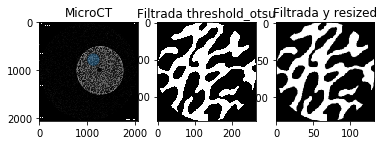

In [8]:
BONE_MCT = color.rgb2gray(imread(imagen))

from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
circle = Circle((center[0], center[1]),int(Lx/deltaX_MCT_muestra))
patches = []
patches.append(circle)
p = PatchCollection(patches,'red', alpha=0.4)

fig3, (ax1,ax2,ax3) = plt.subplots(ncols=3, nrows=1)#,figsize=(4, 3))
ax1.imshow(BONE_MCT, cmap=plt.cm.gray, interpolation='nearest')
ax1.add_collection(p)
ax1.set_title('MicroCT')
ax2.imshow(binary_filtrada, cmap=plt.cm.gray, interpolation='nearest')
ax2.set_title('Filtrada threshold_otsu')
ax3.imshow(image_resized, cmap=plt.cm.gray, interpolation='nearest')
ax3.set_title('Filtrada y resized')

#scipy.misc.imsave('2c_binaria_norm__rec0700.png', binary_filtrada)
plt.show()

Una vez obtenidas todas las imágenes se puede crear una superficie en 3D de la matriz ósea utilizando [3DSlicer](https://www.slicer.org/). Se pueden seguir las intrucciones que les dejé en el siguiente [video](https://youtu.be/OoR3KFTUuqQ).

Remarcamos que se debe setear en el programa con la herramienta *Volumes* el parámetro *image spacing* para que 3DSlicer sepa cuál es la distancia en z entre imágen e imágen.

El siguiente paso es reducir la cantidad de elementos y limpiar un poco la malla con [Meshlab](https://www.meshlab.net/). Este software tiene muchas herramientas para trabajar con mallas, cortarlas, bajar la cantidad de elementos, suavizarlas, etc. Se pueden seguir las instrucciones en el siguiente [video](https://youtu.be/cZePY1pwk_Y).
